In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
Delta = 2**-9
theta_1 = .7
theta_2 = .8
theta_3 = 3.0
theta_4 = -.34
sigma = 0
T = 100

Y = np.zeros((2, T+1)) # i is the index for the series and j is the time index

Y[0, 0] = -1.9
Y[1, 0] = 1.2

W = np.zeros(T+1)
W[0] = 0

N = int(T / Delta) # number of steps
t = np.linspace(0, T, N+1) # time vector

In [156]:
# for n in range(0, T,):
#     dW = np.random.normal(0, np.sqrt(Delta))
#     Y[0, n+1] = Y[0, n] + theta_3, * ( Y[0, n] + Y[1, n] - (1/3)*(Y[0, n])**3 + theta_4 ) * Delta + sigma * dW
#     Y[1, n+1] = Y[1, n] - (1/theta_3) * (Y[0, n] + theta_2*Y[1, n] - theta_1) * Delta

# we simulate N steps of size Delta to reach time T
def simulate(sigma, Y1_0, Y2_0, Delta, N, theta_1, theta_2, theta_3, theta_4):
    Y = np.zeros((2, N+1))
    Y[0, 0] = Y1_0
    Y[1, 0] = Y2_0
    for n in range(N):
        dW = np.random.normal(0, np.sqrt(Delta))
        Y[0, n+1] = Y[0, n] + theta_3 * (Y[0, n] + Y[1, n] - (1/3)*Y[0, n]**3 + theta_4) * Delta + sigma * dW
        Y[1, n+1] = Y[1, n] - (1/theta_3) * (Y[0, n] + theta_2*Y[1, n] - theta_1) * Delta
    return Y

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T/ipykernel_10801/164202380.py:18: SyntaxWarning: invalid escape sequence '\s'
  axs[i, 0].set_title(f"$\sigma = {sigma:.2f}$")


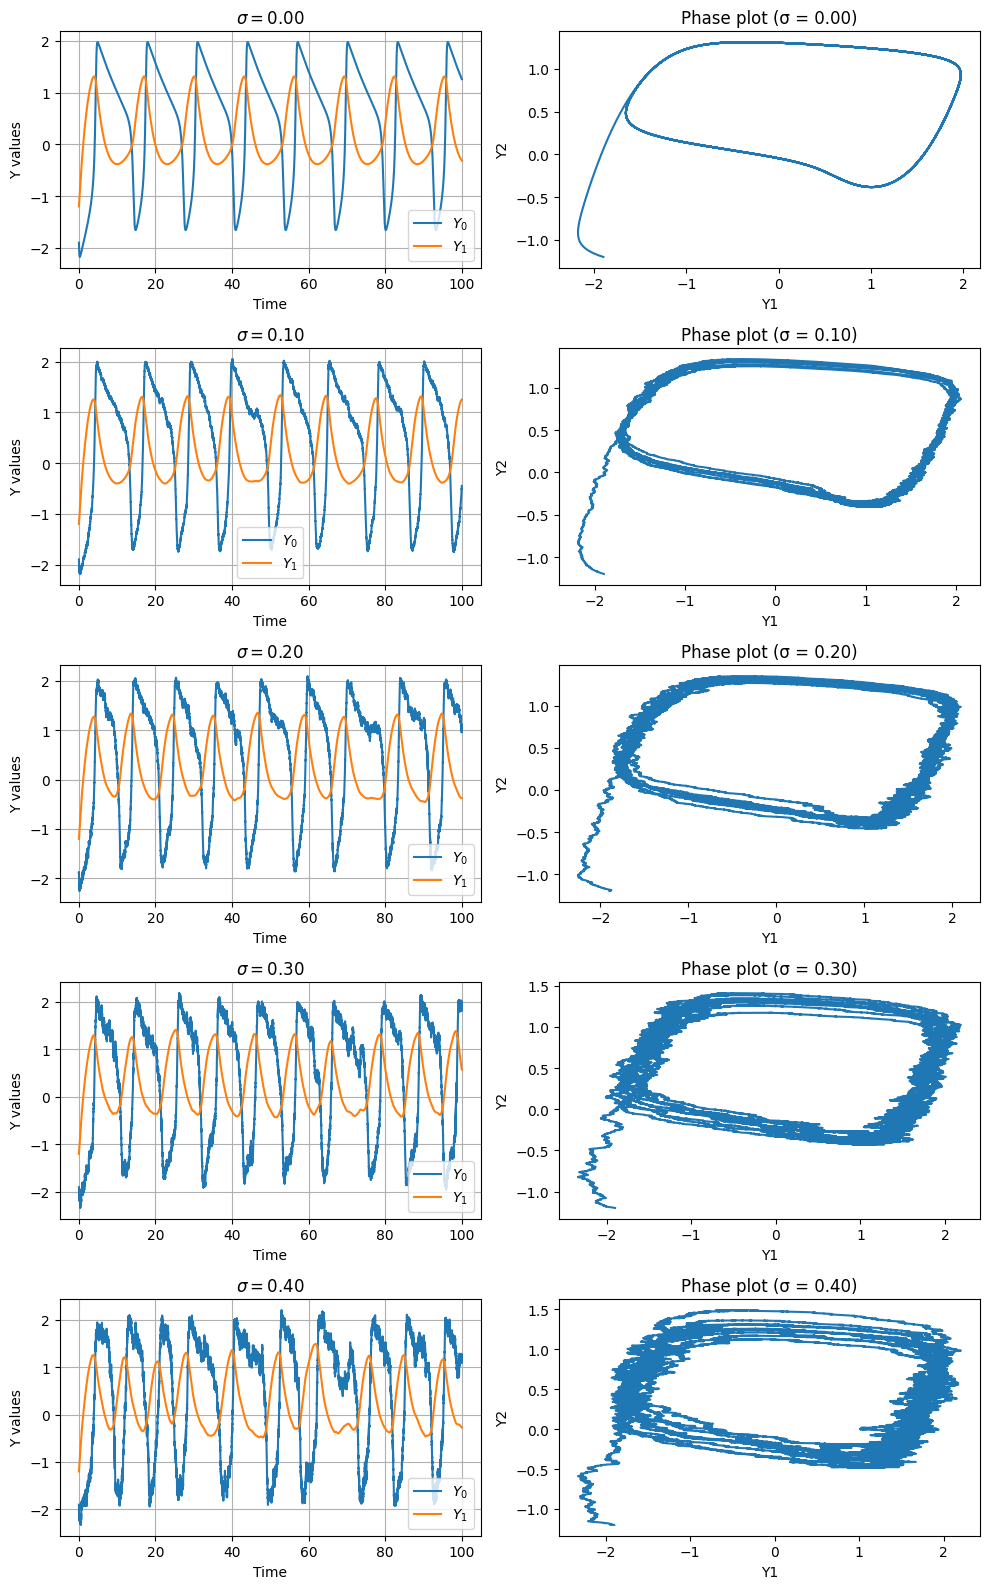

In [173]:
sigmas = [0, 0.10, 0.20, 0.30, 0.40]

fig, axs = plt.subplots(5, 2, figsize=(10, 16))
# axs = axs.flatten()

n = np.arange(0, N+1)

Ys = []

for i, sigma in enumerate(sigmas):

    Y = simulate(sigma, -1.9, -1.2, Delta, N, theta_1, theta_2, theta_3, theta_4)
    Ys.append(Y)
    

    axs[i, 0].plot(t, Y[0], label='$Y_0$')
    axs[i, 0].plot(t, Y[1], label='$Y_1$')
    axs[i, 0].set_title(f"$\sigma = {sigma:.2f}$")
    axs[i, 0].set_xlabel("Time")
    axs[i, 0].set_ylabel("Y values")
    axs[i, 0].legend()
    axs[i, 0].grid(True)
    
    axs[i,1].plot(Y[0], Y[1])
    axs[i,1].set_title(f"Phase plot (σ = {sigma:.2f})")
    axs[i,1].set_xlabel("Y1")
    axs[i,1].set_ylabel("Y2")
    
    

# Hide empty subplot(s)
# axs[-1].set_visible(False)

plt.tight_layout()
plt.show()

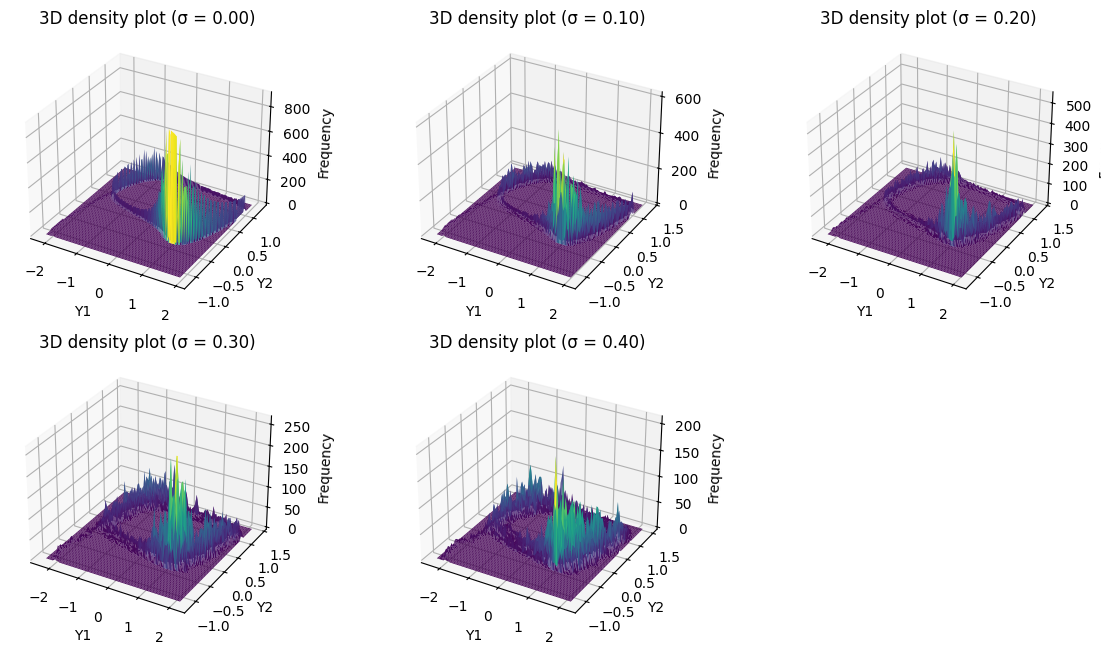

In [189]:
# 1.2
# Ys is a list where each element corresponds to the simulation results for a specific sigma value


fig = plt.figure(figsize=(12, 10))

for i, sigma in enumerate(sigmas):

    Y = Ys[i]  # corresponding simulation result

    # Compute how often each region is visited
    # 2D histogram over 100×100 grid
    # hist: a 2D array of counts
    # xedges, yedges: the edges of the bins along each dimension
    hist, xedges, yedges = np.histogram2d(Y[0], Y[1], bins=100) # hist[i,j] = number of (Y1,Y2) pairs in that cell.

    # Compute bin centers
    # meshgrid for plotting
    # np.meshgrid creates two 2D arrays so that X[i,j] and Ygrid[i,j] form coordinate pairs for each histogram cell.
    xcenters = 0.5 * (xedges[:-1] + xedges[1:])
    ycenters = 0.5 * (yedges[:-1] + yedges[1:])
    X, Ygrid = np.meshgrid(xcenters, ycenters)

    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    ax.plot_surface(X, Ygrid, hist.T, cmap='viridis', rstride=1, cstride=1)
    ax.set_title(f"3D density plot (σ = {sigma:.2f})")
    ax.set_xlabel('Y1')
    ax.set_ylabel('Y2')
    ax.set_zlabel('Frequency')

plt.tight_layout(pad=2.0)
plt.show()
